1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.datasets  import load_iris
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data_set = load_iris()
dir(data_set)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
data_set.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data_set.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data_set.data,columns=data_set.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df = pd.concat([df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns'),pd.DataFrame(data_set.target,columns=['target'])],axis='columns')
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [7]:
from sklearn.cluster import KMeans

In [8]:
# from sklearn.preprocessing import MinMaxScaler

# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# df['petal length (cm)']=scaler1.fit_transform(df.drop(['target','petal width (cm)'],axis='columns'))
# df['petal width (cm)']=scaler1.fit_transform(df.drop(['target','petal length (cm)'],axis='columns'))

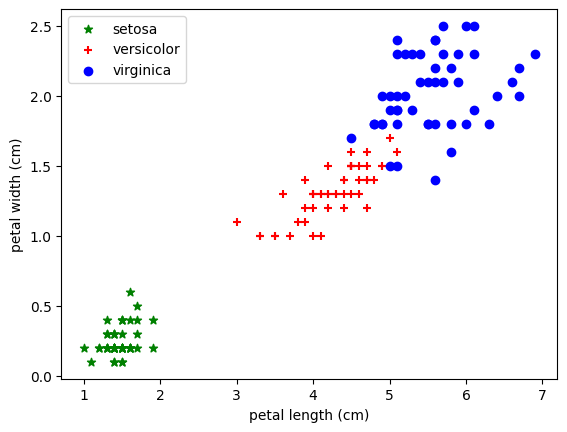

In [9]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='g', marker='*', label=data_set.target_names[0])
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='r', marker='+', label=data_set.target_names[1])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='b', marker='o', label=data_set.target_names[2])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()


In [10]:


sse = []
for i in range(1,9):
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

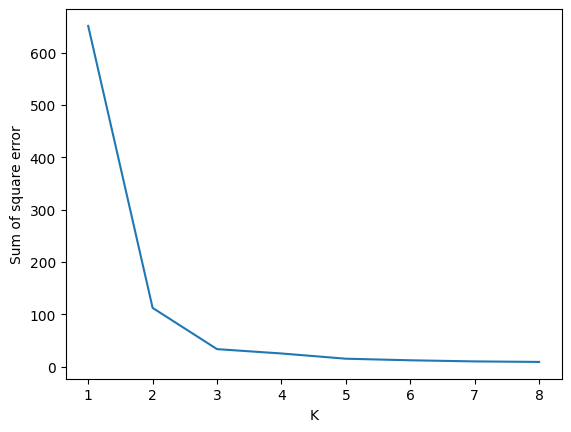

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of square error')
plt.plot(range(1,9),sse)

In [29]:
km = KMeans(n_clusters=3)
km.fit(df.drop(['target'],axis='columns'))

KMeans(n_clusters=3)

In [31]:
# import joblib
# joblib.dump(km,'model.job')
# df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
